In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import nltk


In [6]:
data= pd.read_csv("Reviews.csv")

# Downsampling the data as becuse the dataset is large

data= data.head(500)

In [7]:
data.shape

(500, 10)

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# EDA

In [9]:
# Counting the values of distinct ratings

data['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

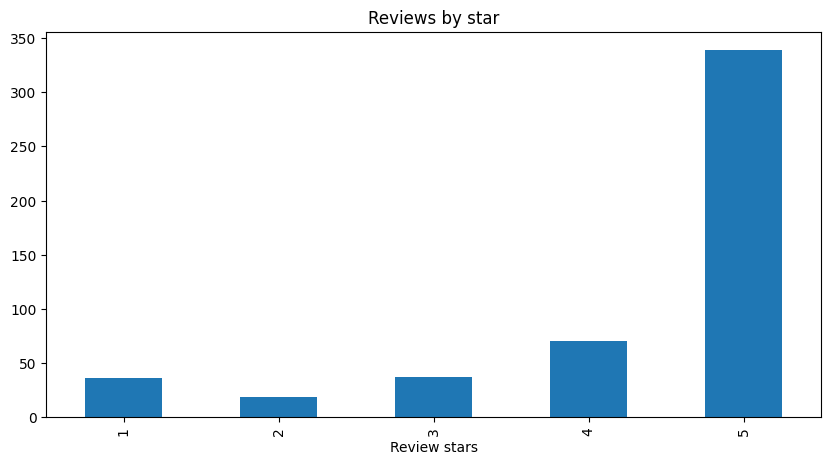

In [10]:
# Plotting 




ax= data["Score"].value_counts().sort_index().plot(kind='bar',title="Reviews by star",figsize=(10,5))

ax.set_xlabel('Review stars')
plt.show()

# NLTK

In [11]:
ex= data['Text'].iloc[50]

ex

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [12]:
tokens=nltk.word_tokenize(ex)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
# Pos tags

tag=nltk.pos_tag(tokens)
tag[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:
# Chunking

entities= nltk.chunk.ne_chunk(tag)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER MODEL

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()

In [16]:
# checking polarity score for the selectd comment

sia.polarity_scores(ex)


#we can see that the overall score is -ve

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
# running the polarity score on the entire dataset
res={}
for i, row in tqdm (data.iterrows(), total=len(data)):

    text=row['Text']
    myid=row['Id']
    res[myid]= sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [19]:
# Creating a dataframe of the results and merging it with the orignal data frame

vaders= pd.DataFrame(res).T

vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(data,how='left')


In [20]:
# Printing the merged dataframe

vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


# PLOTTING RESULTS

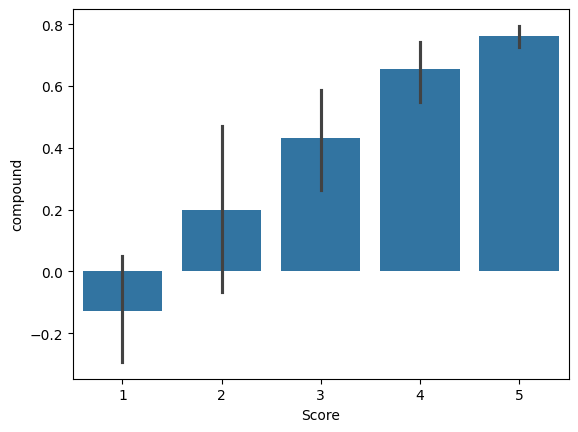

In [21]:
sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound score of amazon reviews by stars')
plt.show()

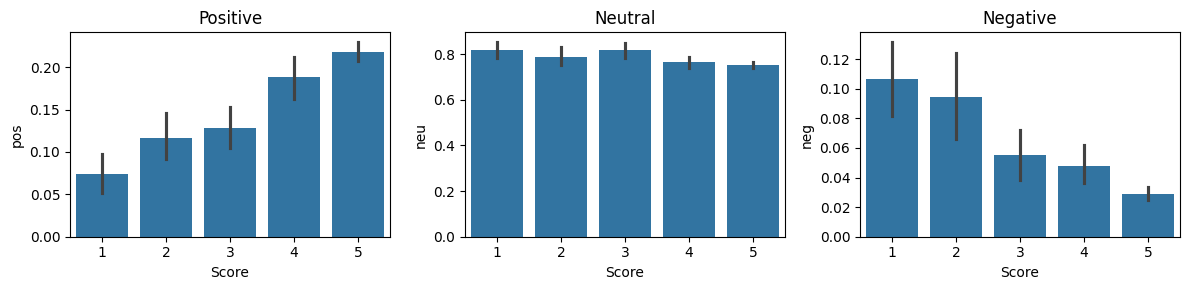

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# BERT MODEL

ENCODER BASED MODEL BASED ON TRANSFORMERS

REQUIRES DATA PRE-PROCESSING

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from collections.abc import Mapping,MutableMapping


In [24]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"

toknizer= AutoTokenizer.from_pretrained(MODEL)

model= AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [26]:
# Vader results
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
# Text encoding for Roberta
# Running our model on the text
# Storing scores in a dictionary

def polarity_scores_roberta(ex):

    encoded= toknizer(ex,return_tensors='pt')
    output= model(**encoded)

    scores= output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
             'roberta_neg' :scores[0],
             'roberta_neu' :scores[1],
             'roberta_pos' :scores[2]
    }            

    return scores_dict


In [28]:
# Running both model for the reference comment (ex)
res={}

for i, row in tqdm(data.iterrows(),total=len(data)):
    text=row['Text']
    myid=row['Id']

    vader_result=sia.polarity_scores(text)

    roberta_result=polarity_scores_roberta(text)

    break


  0%|          | 0/500 [00:00<?, ?it/s]

VADER RESULT

In [29]:
vader_result

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

Roberta result

In [30]:
roberta_result

{'roberta_neg': 0.009624231,
 'roberta_neu': 0.049980372,
 'roberta_pos': 0.94039536}

In [31]:
# Combining vader and roberta results

comb= {**vader_result, ** roberta_result}

In [32]:
# Running both the models for all of the data
res={}

for i, row in tqdm(data.iterrows(),total=len(data)):
   try: 
    
    text=row['Text']
    myid=row['Id']

    vader_result=sia.polarity_scores(text)

    roberta_result=polarity_scores_roberta(text)

    comb= {**vader_result, ** roberta_result}
    res[myid]=comb
   
   except RuntimeError:
    print(f'broke for id{myid}')  
    

  0%|          | 0/500 [00:00<?, ?it/s]

broke for id83
broke for id187


In [33]:
# COMBINING RESULTS WITH THE ORIGNAL DATA FRAME

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')

In [34]:
results_df

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [35]:
# PRINTING RESULT OF BOTH THE MODELS FOR A RANDOM REVIEW

print('VADER SCORE',results_df['compound'].iloc[51])

print('ROBERTA SCORE',results_df['roberta_pos'].iloc[51])

VADER SCORE 0.9194
ROBERTA SCORE 0.9682822823524475


# COMPAIRING BOTH RESULTS

In [36]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

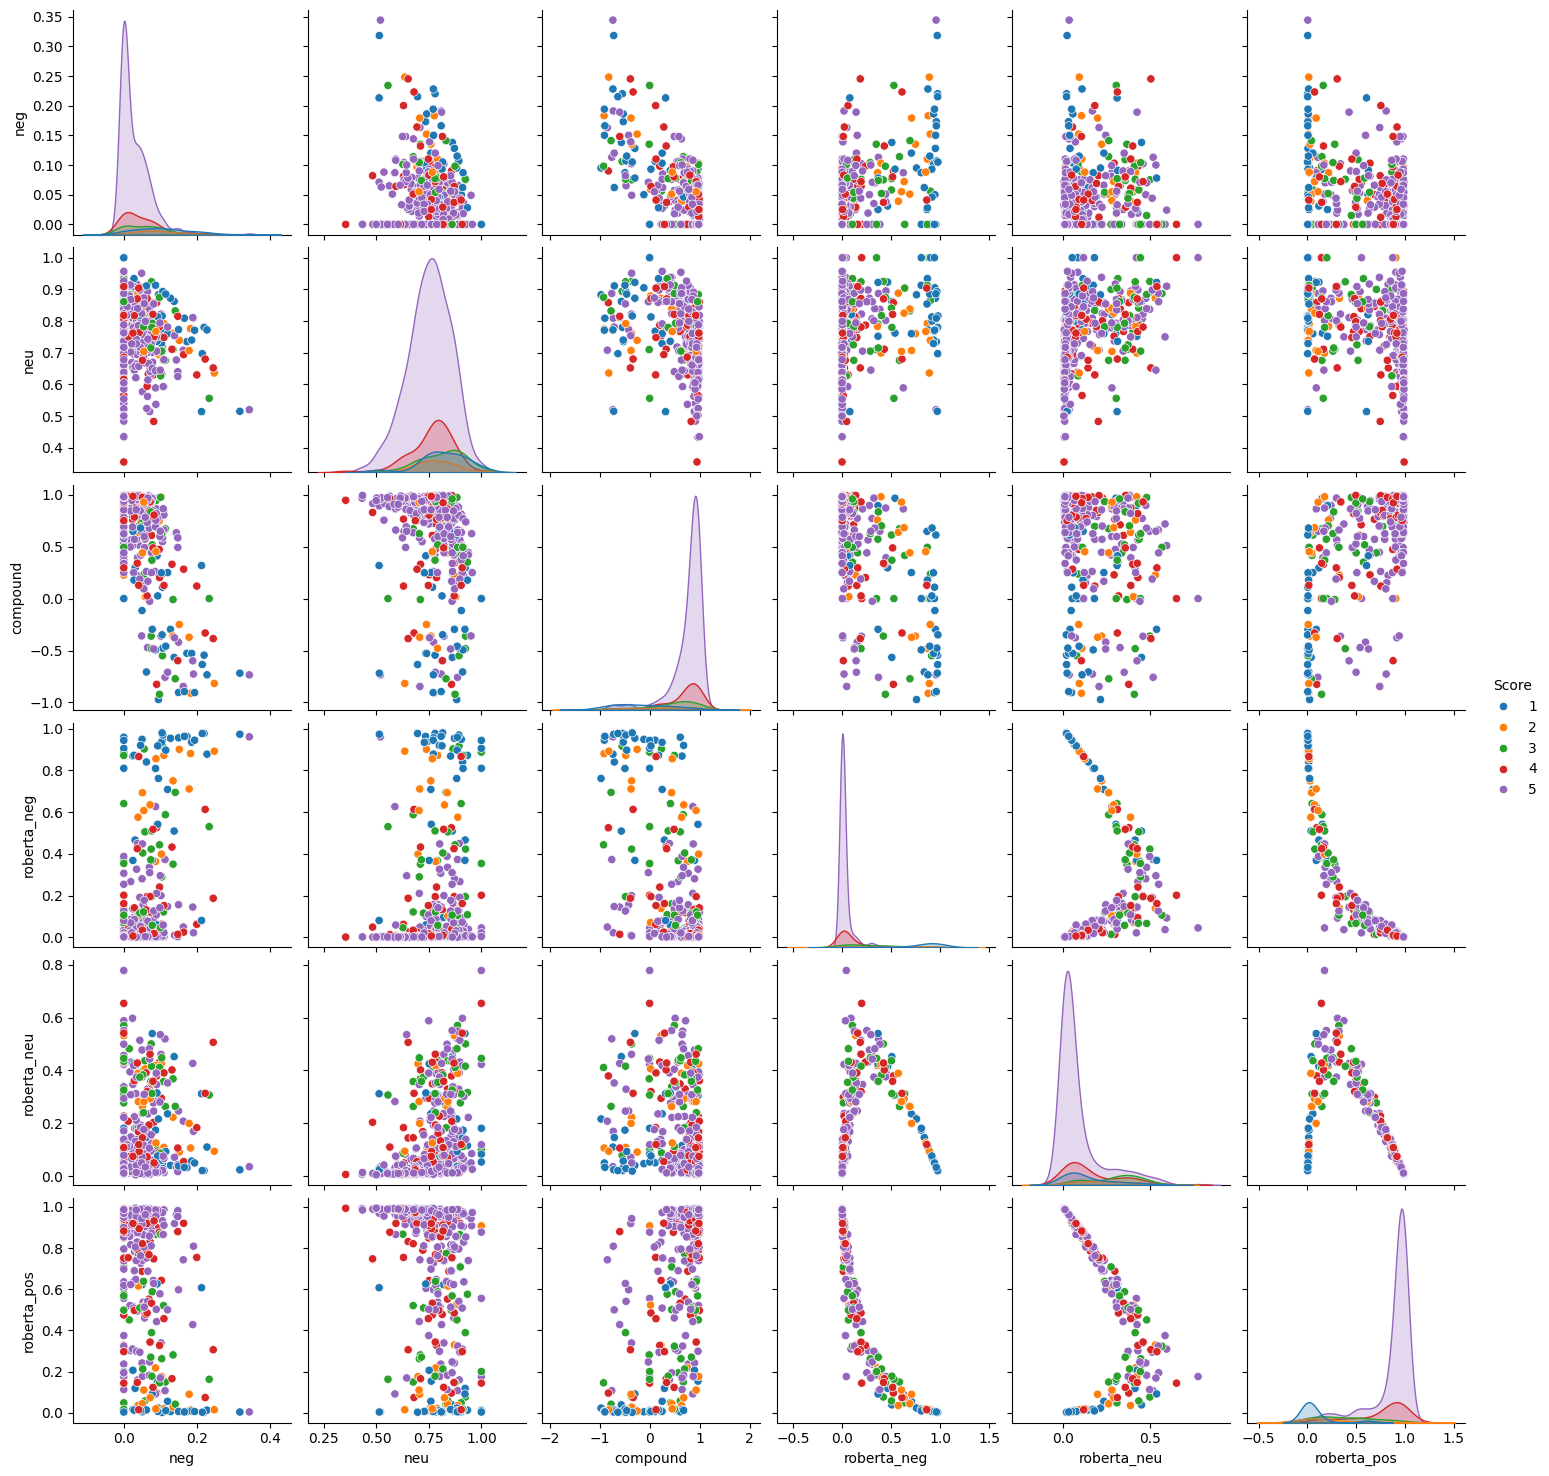

In [37]:
# Pair plot

sns.pairplot(data=results_df,vars=[ 'neg', 'neu', 'compound',  'roberta_neg', 'roberta_neu',
       'roberta_pos'],hue='Score',palette='tab10')